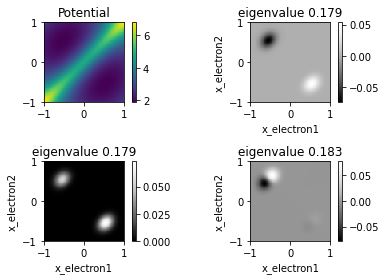

In [10]:
# Exact diagonalization of two interacting electrons in 1D
# Install Python Anaconda
# Start this program from IPython with the commands
# %cd 'directory of this program' e.g. %cd C:\CondMatPhys1
# %run -i problem5.py 
# to get documentation about a function within the program, type help(function) in ipython


# import the required modules 
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants
import scipy.sparse
import scipy.sparse.linalg
import numpy as np 


## default plotting behaviour
plt.rc('image', origin='lower')
plt.rc('image', interpolation='nearest')

##set parameters
n = 100 # number of grid points
a = 1 # lattice constant
r0 = .3 # cutoff for Coulomb interaction (required for regularity in 1D)
V0 = 1 # strength of confinement potential
mr = 1 # ratio of masses of the two electrons


## Test the 3 different values of strength of Coulomb interaction
##ci= 0 # no Coulomb interaction between electrons
##ci= 0.03 # moderate Coulomb interaction between electrons
ci= 1 # strong Coulomb interaction between electrons

# prefactor of kinetic energy - working in meV
#T0 = sp.constants.hbar**2*1e12/(0.067 * sp.constants.m_e * sp.constants.e)*1e3 / 2 * (n-1)**2/(2*a)**2;
T0 = sp.constants.hbar**2*1e12/(sp.constants.m_e * sp.constants.e)*1e3 / 2 * (n-1)**2/(2*a)**2;

# prefactor of interaction energy
Ec = sp.constants.e/(4 * sp.pi * sp.constants.epsilon_0 * 1e-9)

r = sp.ogrid[-a:a:n*1j, -a:a:n*1j]
Vc = Ec * ((r[0]-r[1])**2 + r0**2)**-.5
V = V0 * (r[0]**2 + r[1]**2) + ci*Vc


## using sparse matrices for efficiency (entries which are not set are zero by default and not taken into account during calculations)
# discretized kinetic energy
#6 diagonal lines a defined wich are offest by [0, 1, -1, n, -n] from the main diagonal of the quadratic matrix
T = sp.sparse.diags([2*(1+mr)*np.ones(n*n), -np.ones(n*n-1), -np.ones(n*n-1), -mr*np.ones(n*n-n), -mr*np.ones(n*n-n)], [0, 1, -1, n, -n], format='dok')
 
#set the edge entries back to zero (python excepts an array for indexing)
T[np.arange(n, n*n, n), np.arange(n-1, n*n-1, n)] = 0
T[np.arange(n-1, n*n-1, n), np.arange(n, n*n, n)] = 0


# assemble matrix
T = T0*(T + sp.sparse.diags(V.flat, 0, format='dok')).todia()

# numerical diagonalization: calculate the k lowest ('SA') eigenvalues E and the corresponding wavefunctions psi
E, psi = sp.sparse.linalg.eigsh(T, which = 'SA',  k =3  , ncv=30)

##plot the result
#Plot the potential 
plt.figure()
plt.subplot(2,2,1) #plot 1 of 2x2 plots
imax = plt.imshow(V, extent = (-a, a, -a, a))
plt.title('Potential')
plt.colorbar()

#plot ground and two excited states
for i in range(0, 3):
    plt.subplot(2,2,2+i)
    plt.imax = plt.imshow(psi[:, i].reshape(n, n), cmap=cm.Greys_r, extent = (-a, a, -a, a))
    plt.xlabel('x_electron1')
    plt.ylabel('x_electron2')
    plt.title('eigenvalue %.3f' %E[i])
    plt.colorbar()
    
plt.tight_layout()
plt.savefig(f'1_5_ci_{ci}.pdf')